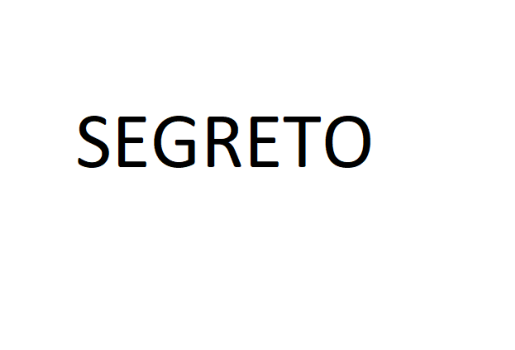

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('secret.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
import itertools

shape = list(img.shape)
shape[0] *= 2
shape[1] *= 2
part1 = np.zeros(shape)
part2 = np.zeros(shape)
print(img.shape, part1.shape, part2.shape)

C0 = list(itertools.permutations([0,0,1,1]))
C1 = [tuple([k ^ 1 for k in c]) for c in C0]
color_trans = {0: np.array([1,1,1]), 1: np.array([0,0,0])}

print(C0, C1)

(400, 600, 3) (800, 1200, 3) (800, 1200, 3)
[(0, 0, 1, 1), (0, 0, 1, 1), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 0, 1, 1), (0, 0, 1, 1), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 1, 1, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 1, 0, 0), (1, 1, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 1, 0, 0), (1, 1, 0, 0)] [(1, 1, 0, 0), (1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 0, 1), (1, 1, 0, 0), (1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1), (0, 0, 1, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1), (0, 0, 1, 1)]


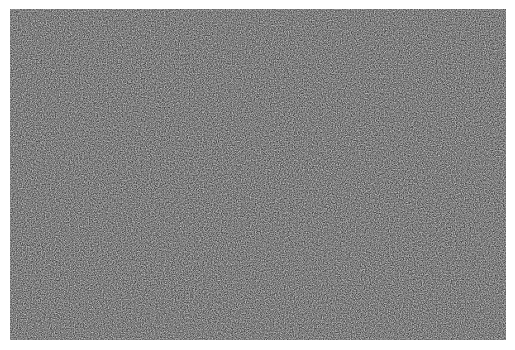

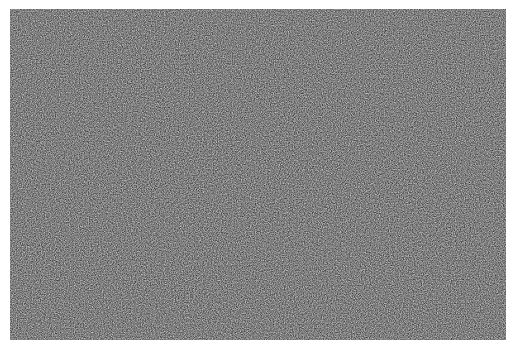

In [21]:
import random

def color_part(part, colors, i, j):
    part[i, j] = color_trans[colors[0]]
    part[i+1, j] = color_trans[colors[1]]
    part[i, j+1] = color_trans[colors[2]]
    part[i+1, j+1] = color_trans[colors[3]]

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        color = img[i, j]
        c_idx = random.randint(0, len(C0)-1)
        color_part(part1, C0[c_idx], 2*i, 2*j)
        if np.max(color) == 0:
            color_part(part2, C1[c_idx], 2*i, 2*j)
        else:
            color_part(part2, C0[c_idx], 2*i, 2*j)
            
plt.imshow(part1)
plt.axis('off')
plt.show()
plt.imshow(part2)
plt.axis('off')
plt.show()

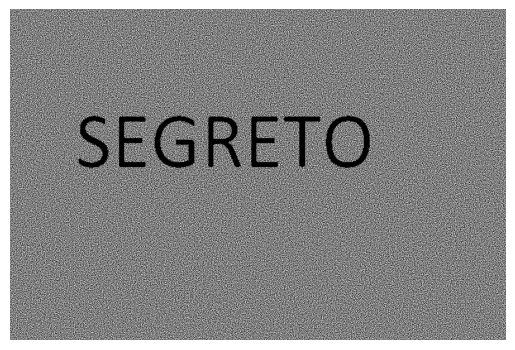

In [22]:
combined = np.zeros(shape)
white = np.ones(3)
black = np.zeros(3)
for i in range(combined.shape[0]):
    for j in range(combined.shape[1]):
        combined[i, j] = white if part1[i,j,0] > 0 and part2[i,j,0] > 0 else black

plt.imshow(combined)
plt.axis('off')
plt.show()